In [6]:
from THM_main import Version5_THM_prototype
from iapws import IAPWS97
import numpy as np
from THM_main import plotting
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import cProfile
import time
# Begining of the script used to test the THM prototype class.

In [7]:
case_name = "Mesh dependency analysis for the BWRX-300 SMR core"
#User choice:
solveConduction = True
plot_at_z1 = []

########## Thermal hydraulics parameters ##########
## Geometric parameters
#User choice:
solveConduction = True
zPlotting = []

If = 8
I1 = 3
# Sensitivity to the meshing parameters
Iz1 = 75 # number of control volumes in the axial direction, added 70 for comparison with GeN-Foam
# Iz1 = 10, 20, 40, 50, 70, 80 and 160 are supported for the DONJON solution


########## Choice of Thermalhydraulics correlation ##########
voidFractionCorrel = 'EPRIvoidCorrel' # 'modBestion', 'HEM1', 'GEramp', 'EPRIvoidModel'
frfaccorel = "Churchill" # 'base', 'blasius', 'Churchill', 'Churchill_notOK' ?
P2Pcorel = "lockhartMartinelli" # 'base', 'HEM1', 'HEM2', 'MNmodel', "lockhartMartinelli"
numericalMethod = "FVM" # "FVM": Solves the system using matrix inversion with preconditioning.
                        # "GaussSiedel" : Applies the Gauss-Seidel iterative solver.
                        # "BiCG" : Uses the BiConjugate Gradient method for solving non-symmetric or indefinite matrices.
                        # "BiCGStab" : Applies the BiCGStab (BiConjugate Gradient Stabilized) method to ensure faster and more stable convergence.

########## Thermal hydraulics parameters ##########
## Geometric parameters
canalType = "square" # "square", "cylindrical"
pitch =1.295e-2 #1.295e-2 # m : ATRIUM10 pincell pitch   0.0126 #
fuelRadius = 0.4435e-2 # m : fuel rod radius
#gapRadius = fuelRadius + 0.000001 # m : expansion gap radius : "void" between fuel and clad - equivalent to inner clad radius
gapRadius = 0.4520e-2 # m : expansion gap radius : "void" between fuel and clad - equivalent to inner clad radius
cladRadius = 0.5140e-2 # m : clad external radius
height = 1.655 # m : height : 3.8 m : active core height in BWRX-300 SMR, 1.555 m : for GeNFoam comparison.


## Fluid parameters
# T_inlet, T_outlet = 270, 287 Celcius
#tInlet = 270 + 273.15 # K, for BWRX-300 SMR core, try lowering the inlet temperature to set boiling point back and reduce the void fraction increase in the first few cm
tInlet = 270 + 273.15 # K, for BWRX-300 SMR core
#Nominal operating pressure = 7.2 MPa (abs)
pOutlet =  7.2e6 # Pa 
# Nominal coolant flow rate = 1530 kg/s
massFlowRate = 8.407 * 10**(-2) #1530  / (200*91)  # kg/s

## Material parameters
kFuel = 4.18 # W/m.K, TECHNICAL REPORTS SERIES No. 59 : Thermal Conductivity of Uranium Dioxide, IAEA, VIENNA, 1966
Hgap = 10000 
#Hgap = 9000
kClad = 21.5 # W/m.K, Thermal Conductivity of Zircaloy-2 (as used in BWRX-300) according to https://www.matweb.com/search/datasheet.aspx?MatGUID=eb1dad5ce1ad4a1f9e92f86d5b44740d
# k_Zircaloy-4 = 21.6 W/m.K too so check for ATRIUM-10 clad material but should have the same thermal conductivity

############ Nuclear Parameters ###########
# Number of fuel rods and assemblies for a small modular Boiling Water Reactor core

listeZ = [int(x) for x in np.logspace(1, 3, num=20)]
listeTime = []
caseMerge = []
def main():
    for i,Iz1 in enumerate(listeZ):
        qFiss = 200000000
        qFiss_init_0 = [0,0,0,0,0]
        for i in range(Iz1):
            qFiss_init_0.append(qFiss)
        
        startTime = time.time()

        caseMerge.append(Version5_THM_prototype("Initialization of BWR Pincell equivalent canal", canalType, pitch, fuelRadius, gapRadius, cladRadius, 
                                height, tInlet, pOutlet, massFlowRate, qFiss_init_0, kFuel, Hgap, kClad, Iz1+5, If, I1, zPlotting, 
                                solveConduction, dt = 0, t_tot = 0, frfaccorel = frfaccorel, P2Pcorel = P2Pcorel, voidFractionCorrel = 'EPRIvoidModel',
                                numericalMethod = numericalMethod))
        
        #print(f"Case 4 uInlet = {case4.convection_sol.uInlet}")


        endTime = time.time()
        listeTime.append(endTime - startTime)

    return caseMerge


caseMerge = main()
#if __name__ == "__main__":
#    cProfile.run('main()', filename='profiling_result.prof')


$$$---------- THM: prototype, case treated : Initialization of BWR Pincell equivalent canal.
$$$---------- THM: prototype, steady state case.
$$---------- Calling DFM class.
Setting up heat convection solution along the axial dimension. zmax = 1.655 m with 15 axial elements.
self.I_z: 15
self.qFlow: 0.08407
self.pOutlet: 7200000.0
self.Lf: 1.655
self.r_f: 0.004435
self.clad_r: 0.00514
self.r_w: 0.01295
self.Dz: 0.11033333333333334
self.dt: 0
Courant number: 0.0
Numerical Method FVM
Velocity at the inlet:  1.2884090506886694
cote: 0.01295
cladRadius: 0.00514
Dh: 0.010490958633360763
Hydraulic diameter: [0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763, 0.010490958633360763]
Fission power fluid
q__: [0.0, 0.0, 0.

In [11]:

class GFPlotter():
    def __init__(self, caseList, directory_path, case_name, second_path = ""):
        self.case_name = f'{case_name}\\'

        self.caseList = caseList
        self.directory_path = directory_path
        self.height = self.caseList[0].convection_sol.height

        self.data_dict_list = []
        self.data_dict = self.read_files_in_directory()
        self.allow_space()

        self.struture_fraction = 1 - (self.alpha_liquid[0] + self.alpha_vapour[0])

        self.calculateFields()
        self.createInterpolatedList()
        self.createZ()

    def plotCase(self):
        title = f"f: {self.caseList[0].convection_sol.frfaccorel}, \n Méthode numérique: {self.caseList[0].convection_sol.numericalMethod}, \n Correlation void fraction: {self.caseList[0].convection_sol.voidFractionCorrel}"
        labelTitle = 'THM_prototype'
        fig1, ax1 = plt.subplots()
        for i in range(len(self.caseList)):
            ax1.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.T_water, label=labelTitle)
        ax1.set_xlabel("Axial position in m")
        ax1.set_ylabel("Temperature in K")
        ax1.set_title(f"{title}")
        ax1.grid()
        ax1.legend(loc="best")
        fig1.savefig(rf'result\{self.case_name}\Tcoolant.png', bbox_inches='tight')

        fig2, ax2 = plt.subplots()
        for i in range(len(self.caseList)):
            ax2.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.voidFraction[-1], label=labelTitle)

        ax2.set_xlabel("Axial position in m")
        ax2.set_ylabel("Void fraction")
        ax2.set_title(f"{title}")
        ax2.grid()
        ax2.legend(loc="best")
        fig2.savefig(rf'result\{self.case_name}\epsilon.png', bbox_inches='tight')

        fig3, ax3 = plt.subplots()
        print(f"rho_mix GenFoam: {self.rho_mixture}")
        for i in range(len(self.caseList)):
            ax3.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rho[-1], label=labelTitle)

        ax3.set_xlabel("Axial position in m")
        ax3.set_ylabel("Density in kg/m^3")
        ax3.set_title(f"{title}")
        ax3.grid()
        ax3.legend(loc="best")
        fig3.savefig(rf'result\{self.case_name}\Rho.png', bbox_inches='tight')

        fig7, ax7 = plt.subplots()
        for i in range(len(self.caseList)):
            ax7.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoL[-1], label=labelTitle)
        ax7.set_xlabel("Axial position in m")
        ax7.set_ylabel("Liquid density in kg/m^3")
        ax7.set_title(f"{title}")
        ax7.grid()
        ax7.legend(loc="best")
        fig7.savefig(rf'result\{self.case_name}\RhoL.png', bbox_inches='tight')

        fig8, ax8 = plt.subplots()
        for i in range(len(self.caseList)):
            ax8.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoG[-1], label=labelTitle)
        ax8.set_xlabel("Axial position in m")
        ax8.set_ylabel("Vapour density in kg/m^3")
        ax8.set_title(f"{title}")
        ax8.grid()
        ax8.legend(loc="best")
        fig8.savefig(rf'result\{self.case_name}\RhoG.png', bbox_inches='tight')

        fig4, ax4 = plt.subplots() 
        for i in range(len(self.caseList)):
            labelTitle = f"THM_prototype {self.caseList[i].convection_sol.frfaccorel}"
            ax4.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.P[-1], label=labelTitle)
        ax4.step(self.zList, self.p_rgh, label="GenFoam P_rgh")
        ax4.set_xlabel("Axial position in m")
        ax4.set_ylabel("Pressure in Pa")
        ax4.grid()
        ax4.set_title(f"{title}")
        ax4.legend(loc="best")
        fig4.savefig(rf'result\{self.case_name}\P.png', bbox_inches='tight')

        fig5, ax5 = plt.subplots()
        for i in range(len(self.caseList)):
            ax5.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ul, label=labelTitle)
        ax5.set_xlabel("Axial position in m")
        ax5.set_ylabel("Liquid Velocity in m/s")
        ax5.set_title(f"{title}")
        ax5.grid()
        ax5.legend(loc="best")
        fig5.savefig(rf'result\{self.case_name}\Ul.png', bbox_inches='tight')

        fig6, ax6 = plt.subplots()
        for i in range(len(self.caseList)):
            ax6.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ug, label=labelTitle)
        ax6.set_xlabel("Axial position in m")
        ax6.set_ylabel("Vapour Velocity in m/s")
        ax6.set_title(f"{title}")
        ax6.grid()
        ax6.legend(loc="best")
        fig6.savefig(rf'result\{self.case_name}\Ug.png', bbox_inches='tight')

        fig9, ax9 = plt.subplots()
        for i in range(len(self.caseList)):
            ax9.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.U[-1], label=labelTitle)
        ax9.set_xlabel("Axial position in m")
        ax9.set_ylabel("Mixture Velocity in m/s")
        ax9.set_title(f"{title}")
        ax9.grid()
        ax9.legend(loc="best")
        fig9.savefig(rf'result\{self.case_name}\U.png', bbox_inches='tight')

        fig10, ax10 = plt.subplots()
        for i in range(len(self.caseList)):
            ax10.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Rel, label=labelTitle)
        ax10.set_xlabel("Axial position in m")
        ax10.set_ylabel("Reynolds number")
        ax10.set_title(f"{title}")
        ax10.grid()
        ax10.legend(loc="best")
        fig10.savefig(rf'result\{self.case_name}\Re.png', bbox_inches='tight')

        fig11, ax11 = plt.subplots()
        ax11.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.xTh[-1], label=labelTitle)
        ax11.set_xlabel("Axial position in m")
        ax11.set_ylabel("xTh")
        ax11.set_title(f"{title}")
        ax11.grid()
        ax11.legend(loc="best")
        fig11.savefig(rf'result\{self.case_name}\xTh.png', bbox_inches='tight')

        
        fig12, ax12 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_liquid = [self.caseList[i].convection_sol.Ul[j] * self.caseList[i].convection_sol.rhoL[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ul))]
            ax12.step(self.caseList[i].convection_sol.z_mesh, rhoUA_liquid, label=labelTitle + " rhoUA_liquid")
        #ax12.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax12.set_xlabel("Axial position in m")
        ax12.set_ylabel("rhoUA_liquid")
        ax12.set_title(f"{title}")
        ax12.grid()
        fig12.savefig(rf'result\{self.case_name}\rhoUA_liquid.png', bbox_inches='tight')

        fig13, ax13 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_vapour = [self.caseList[i].convection_sol.Ug[j] * self.caseList[i].convection_sol.rhoG[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax13.step(self.caseList[i].convection_sol.z_mesh, rhoUA_vapour, label=labelTitle + " rhoUA_vapour")
        #ax13.step(self.zList, self.alphaRhoMagU_vapour, label="GenFoam")
        ax13.set_xlabel("Axial position in m")
        ax13.set_ylabel("rhoUA_vapour")
        ax13.set_title(f"{title}")
        ax13.grid()
        fig13.savefig(rf'result\{self.case_name}\rhoUA_vapour.png', bbox_inches='tight')

        fig14, ax14 = plt.subplots()
        for i in range(len(self.caseList)):
            self.rhoUA = [self.caseList[i].convection_sol.U[-1][j] * self.caseList[i].convection_sol.rho[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax14.step(self.caseList[i].convection_sol.z_mesh, self.rhoUA, label=labelTitle + " rhoUA")
        #ax14.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax14.set_xlabel("Axial position in m")
        ax14.set_ylabel("rhoUA")
        ax14.set_title(f"{title}")
        ax14.grid()
        fig14.savefig(rf'result\{self.case_name}\rhoUA.png', bbox_inches='tight')
        

        plt.show()

    def createZ(self):
        self.zList = np.linspace(0, self.height, len(self.alpha_liquid))

    def read_files_in_directory(self):
        data_dict = {}
        print(f"Reading files in directory: {self.directory_path}")
        # Parcourt tous les fichiers du dossier
        for filename in os.listdir(self.directory_path):
            file_path = os.path.join(self.directory_path, filename)
            print(f"Reading file: {file_path}")
            # Vérifie que c'est bien un fichier
            if os.path.isfile(file_path):

                with open(file_path, 'r') as file:
                    content = file.read()
                    
                    # Trouve la première parenthèse ouvrante et fermante
                    start = content.find('(')
                    end = content.find(')', start)
                    #end = start + 74
                    if start != -1 and end != -1:
                        # Extrait les données entre les parenthèses
                        data_str = content[start+1:end].strip()
                        # Divise les lignes en liste de chaînes
                        data_lines = data_str.splitlines()
                        if len(data_lines) != 1:
                            float_list = [float(item) for item in data_lines]
                            data_dict[filename] = float_list

                    if len(data_lines) == 1:
                        # Trouve la première parenthèse ouvrante et fermante
                        start = content.find('(')
                        end = content.find(';', start)
                        #end = start
                        if start != -1 and end != -1:
                            # Extrait les données entre les parenthèses
                            data_str = content[start+1:end].strip()
                            # Divise les lignes en liste de chaînes
                            data_lines = data_str.splitlines()
                            data_lines.pop()
                            x, y, z = np.zeros(len(data_lines)), np.zeros(len(data_lines)), np.zeros(len(data_lines))
                            for i in range(len(data_lines)):
                                a = values = data_lines[i].strip("()").split()
                                x[i] = float(a[0])
                                y[i] = float(a[1])
                                z[i] = float(a[2])
                            data_dict[fr'{filename}_x'] = x
                            data_dict[fr'{filename}_y'] = y
                            data_dict[fr'{filename}_z'] = z
        
        return data_dict
    
    def allow_space(self):
        self.alpha_liquid = np.array(self.data_dict['alpha.liquid'])
        self.alpha_vapour = np.array(self.data_dict['alpha.vapour'])
        #self.alpha_powerModel = np.array(self.data_dict['alpha.powerModel'])
        self.alphaPhi_liquid = np.array(self.data_dict['alphaPhi.liquid']+ [self.data_dict['alphaPhi.liquid'][-1]])
        self.alphaPhi_vapour = np.array(self.data_dict['alphaPhi.vapour']+ [self.data_dict['alphaPhi.vapour'][-1]])
        self.alphaRhoMagU_liquid = np.array(self.data_dict['alphaRhoMagU.liquid'])#+ [self.data_dict['alphaRhoMagU.liquid'][-1]])
        self.alphaRhoMagU_vapour = np.array(self.data_dict['alphaRhoMagU.vapour'])#+ [self.data_dict['alphaRhoMagU.vapour'][-1]])
        self.alphaRhoPhi_liquid = np.array(self.data_dict['alphaRhoPhi.liquid']+ [self.data_dict['alphaRhoPhi.liquid'][-1]])
        self.alphaRhoPhi_vapour = np.array(self.data_dict['alphaRhoPhi.vapour']+ [self.data_dict['alphaRhoPhi.vapour'][-1]])
        self.areaDensity_interface = np.array(self.data_dict['areaDensity.interface'])
        self.dgdt_liquid = np.array(self.data_dict['dgdt.liquid'])
        self.dgdt_vapour = np.array(self.data_dict['dgdt.vapour'])
        self.dmdt_vapour = np.array(self.data_dict['dmdt.liquid.vapour'])
        self.heatFlux_structure = np.array(self.data_dict['heatFlux.structure'])
        self.htc_liquid_interface = np.array(self.data_dict['htc.liquid.interface'])
        self.htc_liquid_structure = np.array(self.data_dict['htc.liquid.structure'])
        self.p = np.array(self.data_dict['p'])
        self.p_rgh = np.array(self.data_dict['p_rgh'])
        self.Re_liquid_structure = np.array(self.data_dict['Re.liquid.structure'])
        #self.Re_vapour_structure = np.array(self.data_dict['Re.vapour.structure'])
        self.Re_liquid_vapour = np.array(self.data_dict['Re.liquid.vapour'])
        self.T_fixedPower = np.array(self.data_dict['T.fixedPower'])
        self.T_liquid = np.array(self.data_dict['T.liquid'])
        self.T_vapour = np.array(self.data_dict['T.vapour'])
        self.U_liquid_x = np.array(self.data_dict['U.liquid_x'])
        self.U_liquid_y = np.array(self.data_dict['U.liquid_y'])
        self.U_liquid_z = np.array(self.data_dict['U.liquid_z'])
        self.U_vapour_x = np.array(self.data_dict['U.vapour_x'])
        self.U_vapour_y = np.array(self.data_dict['U.vapour_y'])
        self.U_vapour_z = np.array(self.data_dict['U.vapour_z'])

    def calculateFields(self):
        self.alpha_vapour = self.alpha_vapour/(1-self.struture_fraction)
        self.alpha_liquid = self.alpha_liquid/(1-self.struture_fraction)
        self.U_liquid = np.sqrt(self.U_liquid_x**2 + self.U_liquid_y**2 + self.U_liquid_z**2)
        self.U_vapour = np.sqrt(self.U_vapour_x**2 + self.U_vapour_y**2 + self.U_vapour_z**2)
        self.U_mixture = (1-self.alpha_vapour) * self.U_liquid + self.alpha_vapour * self.U_vapour

        self.rho_liquid  = self.alphaRhoPhi_liquid/(self.alphaPhi_liquid)
        self.rho_vapour = self.alphaRhoPhi_vapour/(self.alphaPhi_vapour)
        for i in range(len(self.rho_vapour)):
            if np.isnan(self.rho_vapour[i]):
                self.rho_vapour[i] = 0
            if np.isnan(self.rho_liquid[i]):
                self.rho_liquid[i] = 0
        print(f"rho_liquid GeN-Foam: {self.rho_liquid}")
        print(f"rho_vapour GeN-Foam: {self.rho_vapour}")
        self.rho_mixture = self.rho_liquid + self.rho_vapour

        self.T_mixture = (1-self.alpha_vapour) * self.T_liquid + self.alpha_vapour * self.T_vapour

    def plotComparison(self):
        file_path = rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\THM_prototype\result\{self.case_name}'
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        if len(self.caseList) == 1:
            labelTitle = 'THM_prototype'
        labelTitle = 'THM_prototype'
        title = ""#f"f: {self.caseList[0].convection_sol.frfaccorel}, \n Méthode numérique: {self.caseList[0].convection_sol.numericalMethod}, \n Correlation void fraction: {self.caseList[0].convection_sol.voidFractionCorrel}"
        
        fig0, ax0 = plt.subplots()
        for i in range(len(self.caseList)):
            ax0.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.xTh[-1], label=labelTitle)
        ax0.set_xlabel("Axial position in m")
        ax0.set_ylabel("Quality")
        ax0.set_title(f"{title}")
        ax0.grid()
        ax0.legend(loc="best")
        fig0.savefig(rf'result\{self.case_name}\xTh.png', bbox_inches='tight')

        fig1, ax1 = plt.subplots()
        for i in range(len(self.caseList)):
            ax1.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.T_water, label=labelTitle)
        #ax1.step(self.zList, self.T_liquid, label="GenFoam T.liquid")
        #ax1.step(self.zList, self.T_vapour, label="GenFoam T.vapour")
        ax1.step(self.zList, self.T_mixture, label="GenFoam")
        ax1.set_xlabel("Axial position in m")
        ax1.set_ylabel("Temperature in K")
        ax1.set_title(f"{title}")
        ax1.grid()
        ax1.legend(loc="best")
        fig1.savefig(rf'result\{self.case_name}\Tcoolant.png', bbox_inches='tight')

        fig2, ax2 = plt.subplots()
        for i in range(len(self.caseList)):
            ax2.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.voidFraction[-1], label=labelTitle)
        ax2.step(self.zList, self.alpha_vapour, label="GenFoam")
        ax2.set_xlabel("Axial position in m")
        ax2.set_ylabel("Void fraction")
        ax2.set_title(f"{title}")
        ax2.grid()
        ax2.legend(loc="best")
        fig2.savefig(rf'result\{self.case_name}\epsilon.png', bbox_inches='tight')

        fig3, ax3 = plt.subplots()
        print(f"rho_mix GeN-Foam: {self.rho_mixture}")
        for i in range(len(self.caseList)):
            ax3.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rho[-1], label=labelTitle)
        ax3.plot(self.zList, self.rho_mixture, label="GenFoam")
        ax3.set_xlabel("Axial position in m")
        ax3.set_ylabel("Density in kg/m^3")
        ax3.set_title(f"{title}")
        ax3.grid()
        ax3.legend(loc="best")
        fig3.savefig(rf'result\{self.case_name}\Rho.png', bbox_inches='tight')

        fig7, ax7 = plt.subplots()
        for i in range(len(self.caseList)):
            ax7.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoL[-1], label=labelTitle)
        ax7.plot(self.zList, self.rho_liquid, label="GenFoam")
        ax7.set_xlabel("Axial position in m")
        ax7.set_ylabel("Liquid density in kg/m^3")
        ax7.set_title(f"{title}")
        ax7.grid()
        ax7.legend(loc="best")
        fig7.savefig(rf'result\{self.case_name}\RhoL.png', bbox_inches='tight')

        fig8, ax8 = plt.subplots()
        for i in range(len(self.caseList)):
            ax8.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoG[-1], label=labelTitle)
        ax8.plot(self.zList, self.rho_vapour, label="GenFoam")
        ax8.set_xlabel("Axial position in m")
        ax8.set_ylabel("Vapour density in kg/m^3")
        ax8.set_title(f"{title}")
        ax8.grid()
        ax8.legend(loc="best")
        fig8.savefig(rf'result\{self.case_name}\RhoG.png', bbox_inches='tight')

        fig4, ax4 = plt.subplots() 
        for i in range(len(self.caseList)):
            labelTitle = f"THM_prototype {self.caseList[i].convection_sol.frfaccorel} {self.caseList[i].convection_sol.P2Pcorel}"
            ax4.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.P[-1], label=labelTitle)
        ax4.step(self.zList, self.p, label="GenFoam")
        ax4.step(self.zList, self.p_rgh, label="GenFoam P_rgh")
        ax4.set_xlabel("Axial position in m")
        ax4.set_ylabel("Pressure in Pa")
        ax4.grid()
        ax4.set_title(f"{title}")
        ax4.legend(loc="best")
        fig4.savefig(rf'result\{self.case_name}\P.png', bbox_inches='tight')

        fig5, ax5 = plt.subplots()
        for i in range(len(self.caseList)):
            ax5.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ul, label=labelTitle)
        ax5.step(self.zList, self.U_liquid, label="GenFoam")
        ax5.set_xlabel("Axial position in m")
        ax5.set_ylabel("Liquid Velocity in m/s")
        ax5.set_title(f"{title}")
        ax5.grid()
        ax5.legend(loc="best")
        fig5.savefig(rf'result\{self.case_name}\Ul.png', bbox_inches='tight')

        fig6, ax6 = plt.subplots()
        for i in range(len(self.caseList)):
            ax6.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ug, label=labelTitle)
        ax6.step(self.zList, self.U_vapour, label="GenFoam")
        ax6.set_xlabel("Axial position in m")
        ax6.set_ylabel("Vapour Velocity in m/s")
        ax6.set_title(f"{title}")
        ax6.grid()
        ax6.legend(loc="best")
        fig6.savefig(rf'result\{self.case_name}\Ug.png', bbox_inches='tight')

        fig9, ax9 = plt.subplots()
        for i in range(len(self.caseList)):
            ax9.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.U[-1], label=labelTitle)
        ax9.step(self.zList, self.U_mixture, label="GenFoam")
        ax9.set_xlabel("Axial position in m")
        ax9.set_ylabel("Mixture Velocity in m/s")
        ax9.set_title(f"{title}")
        ax9.grid()
        ax9.legend(loc="best")
        fig9.savefig(rf'result\{self.case_name}\U.png', bbox_inches='tight')

        fig10, ax10 = plt.subplots()
        for i in range(len(self.caseList)):
            ax10.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Rel, label=labelTitle)
        ax10.step(self.zList, self.Re_liquid_structure, label="GenFoam")
        ax10.set_xlabel("Axial position in m")
        ax10.set_ylabel("Reynolds number")
        ax10.set_title(f"{title}")
        ax10.grid()
        ax10.legend(loc="best")
        fig10.savefig(rf'result\{self.case_name}\Re.png', bbox_inches='tight')

        fig11, ax11 = plt.subplots()
        ax11.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.xTh[-1], label=labelTitle)
        ax11.set_xlabel("Axial position in m")
        ax11.set_ylabel("xTh")
        ax11.set_title(f"{title}")
        ax11.grid()
        ax11.legend(loc="best")
        fig11.savefig(rf'result\{self.case_name}\xTh.png', bbox_inches='tight')

        
        fig12, ax12 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_liquid = [self.caseList[i].convection_sol.Ul[j] * self.caseList[i].convection_sol.rhoL[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ul))]
            ax12.step(self.caseList[i].convection_sol.z_mesh, rhoUA_liquid, label=labelTitle + " rhoUA_liquid")
        #ax12.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax12.set_xlabel("Axial position in m")
        ax12.set_ylabel("rhoUA_liquid")
        ax12.set_title(f"{title}")
        ax12.grid()
        fig12.savefig(rf'result\{self.case_name}\rhoUA_liquid.png', bbox_inches='tight')

        fig13, ax13 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_vapour = [self.caseList[i].convection_sol.Ug[j] * self.caseList[i].convection_sol.rhoG[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax13.step(self.caseList[i].convection_sol.z_mesh, rhoUA_vapour, label=labelTitle + " rhoUA_vapour")
        #ax13.step(self.zList, self.alphaRhoMagU_vapour, label="GenFoam")
        ax13.set_xlabel("Axial position in m")
        ax13.set_ylabel("rhoUA_vapour")
        ax13.set_title(f"{title}")
        ax13.grid()
        fig13.savefig(rf'result\{self.case_name}\rhoUA_vapour.png', bbox_inches='tight')

        fig14, ax14 = plt.subplots()
        for i in range(len(self.caseList)):
            self.rhoUA = [self.caseList[i].convection_sol.U[-1][j] * self.caseList[i].convection_sol.rho[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax14.step(self.caseList[i].convection_sol.z_mesh, self.rhoUA, label=labelTitle + " rhoUA")
        #ax14.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax14.set_xlabel("Axial position in m")
        ax14.set_ylabel("rhoUA")
        ax14.set_title(f"{title}")
        ax14.grid()
        fig14.savefig(rf'result\{self.case_name}\rhoUA.png', bbox_inches='tight')
        

        plt.show()

    def computeErrors(self):
        self.error_T_abs = []
        self.error_T_rel = []
        self.error_p_abs = []
        self.error_p_rel = []
        self.error_rho_abs = []
        self.error_rho_rel = []
        self.error_U_abs = []
        self.error_U_rel = []
        self.error_Re_abs = []
        self.error_Re_rel = []
        self.error_eps_abs = []
        self.error_eps_rel = []
        self.RMS_T = []
        self.RMS_p = []
        self.RMS_rho = []
        self.RMS_U = []
        self.RMS_Re = []
        self.RMS_eps = []

        for i in range(len(self.caseList)):
            self.error_T_abs.append((self.T_mixture - self.caseList[i].convection_sol.T_water))
            self.error_T_rel.append(100*self.error_T_abs[-1]/(self.T_mixture))
            self.error_p_abs.append((self.p - self.caseList[i].convection_sol.P[-1]))
            self.error_p_rel.append(100*self.error_p_abs[-1]/(self.p))
            self.error_rho_abs.append(self.rho_mixture - self.caseList[i].convection_sol.rho[-1])
            self.error_rho_rel.append(100*self.error_rho_abs[-1]/(self.rho_mixture))
            self.error_U_abs.append((self.U_mixture - self.caseList[i].convection_sol.U[-1]))
            self.error_U_rel.append(100*self.error_U_abs[-1]/(self.U_mixture))
            self.error_Re_abs.append((self.Re_liquid_structure - self.caseList[i].convection_sol.Rel))
            self.error_Re_rel.append(100*self.error_Re_abs[-1]/(self.Re_liquid_structure))
            self.error_eps_abs.append(100*(self.alpha_vapour - self.caseList[i].convection_sol.voidFraction[-1]))
            self.error_eps_rel.append(self.error_eps_abs[-1]/(self.alpha_vapour))

            n = len(self.error_T_rel[i])
            print(f'n = {n}')
            self.RMS_T.append(np.sqrt((1/n)*np.sum(self.error_T_abs[i]**2)))
            self.RMS_p.append(np.sqrt((1/n)*np.sum(self.error_p_abs[i]**2)))
            self.RMS_rho.append(np.sqrt((1/n)*np.sum(self.error_rho_abs[i]**2)))
            self.RMS_U.append(np.sqrt((1/n)*np.sum(self.error_U_abs[i]**2)))
            self.RMS_Re.append(np.sqrt((1/n)*np.sum(self.error_Re_abs[i]**2)))
            self.RMS_eps.append(np.sqrt((1/n)*np.sum((self.error_eps_abs[i]/100)**2)))
            print(f'RMS_eps: {self.RMS_eps}')


    def plotErrors(self):
        self.computeErrors()
        fig, ax = plt.subplots()
        for i in range(len(self.caseList)):
            print(self.error_p_abs)
            ax.step(self.zList, self.error_p_abs[i])

        ax.set_xlabel("Axial position in m")
        ax.set_ylabel("Absolute error in Pa")
        ax.set_title("Absolute error in pressure")
        ax.grid()
        ax.legend(loc="best")
        fig.savefig(rf'result\{self.case_name}\error_p_abs.png', bbox_inches='tight')

        fig1, ax1 = plt.subplots()
        for i in range(len(self.caseList)):
            ax1.step(self.zList, self.error_p_rel[i], label=f"Axial mesh: {self.caseList[i].convection_sol.nCells}")
            
        ax1.set_xlabel("Axial position in m")
        ax1.set_ylabel("Presure elative error in %")
        ax1.grid()
        ax1.legend(loc="best")
        fig1.savefig(rf'result\{self.case_name}\error_p_rel.png', bbox_inches='tight')

        fig2, ax2 = plt.subplots()
        for i in range(len(self.caseList)):
            ax2.step(self.zList, self.error_T_rel[i], label=f"Axial mesh: {self.caseList[i].convection_sol.nCells}")
        ax2.set_xlabel("Axial position in m")
        ax2.set_ylabel("Temperature relative error in %")
        ax2.grid()
        ax2.legend(loc="best")
        fig2.savefig(rf'result\{self.case_name}\error_T_rel.png', bbox_inches='tight')

        fig3, ax3 = plt.subplots()
        for i in range(len(self.caseList)):
            ax3.step(self.zList, self.error_rho_rel[i], label=f"Axial mesh: {self.caseList[i].convection_sol.nCells}")
        ax3.set_xlabel("Axial position in m")
        ax3.set_ylabel("Density relative error in %")
        ax3.grid()
        ax3.legend(loc="best")
        fig3.savefig(rf'result\{self.case_name}\error_rho_rel.png', bbox_inches='tight')

        fig4, ax4 = plt.subplots()
        for i in range(len(self.caseList)):
            ax4.step(self.zList, self.error_U_rel[i], label=f"Axial mesh: {self.caseList[i].convection_sol.nCells}")
        ax4.set_xlabel("Axial position in m")
        ax4.set_ylabel("Velocity relative error in %")
        ax4.grid()
        ax4.legend(loc="best")
        fig4.savefig(rf'result\{self.case_name}\error_U_rel.png', bbox_inches='tight')

        fig5, ax5 = plt.subplots()
        for i in range(len(self.caseList)):
            ax5.step(self.zList, self.error_Re_rel[i], label=f"Axial mesh: {self.caseList[i].convection_sol.nCells}")
        ax5.set_xlabel("Axial position in m")
        ax5.set_ylabel("Reynolds number relative error in %")
        ax5.grid()
        fig5.savefig(rf'result\{self.case_name}\error_Re_rel.png', bbox_inches='tight')

        fig5, ax5 = plt.subplots()  
        for i in range(len(self.caseList)):
            ax5.step(self.zList, self.error_eps_rel[i], label=f"Axial mesh: {self.caseList[i].convection_sol.nCells}")
        ax5.set_xlabel("Axial position in m")
        ax5.set_ylabel("Void fraction relative error in %")
        ax5.grid()
        ax5.legend(loc="best")
        fig5.savefig(rf'result\{self.case_name}\error_eps_rel.png', bbox_inches='tight')

        plt.show()

        IzList = [self.caseList[i].convection_sol.nCells for i in range(len(self.caseList))]
        pressureError = [np.mean(abs(self.error_p_rel[i])) for i in range(len(self.caseList))]
        temperatureError = [np.mean(abs(self.error_T_rel[i])) for i in range(len(self.caseList))]
        densityError = [np.mean(abs(self.error_rho_rel[i])) for i in range(len(self.caseList))]
        velocityError = [np.mean(abs(self.error_U_rel[i])) for i in range(len(self.caseList))]
        ReynoldsError = [np.mean(abs(self.error_Re_rel[i])) for i in range(len(self.caseList))]
        voidFractionError = [np.mean(abs(self.error_eps_abs[i])) for i in range(len(self.caseList))]
    
        fig6, ax6 = plt.subplots()
        print(f'voidFraction Error: {voidFractionError}')
        ax6.scatter(IzList, temperatureError, label="Temperature", marker='d')
        ax6.scatter(IzList, pressureError, label="Pressure", marker='o')
        ax6.set_xlabel("Axial mesh")
        ax6.set_ylabel("Mean relative error in %")
        ax6.grid()
        ax6.legend(loc="best")

        fig7, ax7 = plt.subplots()
        ax7.scatter(IzList, voidFractionError, label="Void fraction", marker='p')
        ax7.scatter(IzList, densityError, label="Density", marker='x')
        ax7.scatter(IzList, velocityError, label="Velocity", marker='s')
        ax7.set_xlabel("Axial mesh")
        ax7.set_ylabel("Mean relative error in %")
        ax7.legend(loc="best")
        ax7.grid()
        ax7.legend(loc="best")

        for i in range(len(self.caseList)):
            print(f"Mean relative error in pressure: {np.mean(self.error_p_rel[i])}, max relative error in pressure {np.max(self.error_p_rel[i])} for axial mesh {self.caseList[i].convection_sol.nCells}")
            print(f"Mean relative error in temperature: {np.mean(self.error_T_rel[i])}, max relative error in temperature {np.max(self.error_T_rel[i])} for axial mesh {self.caseList[i].convection_sol.nCells}")
            print(f"Mean relative error in density: {np.mean(self.error_rho_rel[i])}, max relative error in density {np.max(self.error_rho_rel[i])} for axial mesh {self.caseList[i].convection_sol.nCells}")
            print(f"Mean relative error in velocity: {np.mean(self.error_U_rel[i])}, max relative error in velocity {np.max(self.error_U_rel[i])} for axial mesh {self.caseList[i].convection_sol.nCells}")
            print(f"Mean relative error in Reynolds number: {np.mean(self.error_Re_rel[i])}, max relative error in Reynolds number {np.max(self.error_Re_rel[i])} for axial mesh {self.caseList[i].convection_sol.nCells}")
            print(f"Mean relative error in void fraction: {np.mean(self.error_eps_abs[i])}, max relative error in void fraction {np.max(self.error_eps_rel[i])} for axial mesh {self.caseList[i].convection_sol.nCells}")


    def createInterpolation(self, x_values):
        y_length = len(self.alpha_liquid)
        print(f'before x_values: {x_values}')
        # Indices des valeurs initiales
        x_indices = np.linspace(0, len(x_values) - 1, num=len(x_values))
        # Indices pour les nouvelles valeurs
        y_indices = np.linspace(0, len(x_values) - 1, num=y_length)
        
        # Interpolation linéaire
        print(f'after y_indices: {y_indices}')
        print(f'after x_indices: {x_indices}')
        print(f'after x_values: {x_values}')
        interpolated_values = np.interp(y_indices, x_indices, x_values)
        return interpolated_values.tolist()
    
    def createInterpolatedList(self):
        for i in range(len(self.caseList)):
            print(f'i: {i}')
            print(f'void fraction{self.caseList[i].convection_sol.voidFraction}')
            self.caseList[i].convection_sol.T_water = self.createInterpolation(self.caseList[i].convection_sol.T_water)
            self.caseList[i].convection_sol.voidFraction[-1] = self.createInterpolation(self.caseList[i].convection_sol.voidFraction[-1])
            self.caseList[i].convection_sol.rho[-1] = self.createInterpolation(self.caseList[i].convection_sol.rho[-1])
            self.caseList[i].convection_sol.P[-1] = self.createInterpolation(self.caseList[i].convection_sol.P[-1])
            self.caseList[i].convection_sol.U[-1] = self.createInterpolation(self.caseList[i].convection_sol.U[-1])
            self.caseList[i].convection_sol.Rel = self.createInterpolation(self.caseList[i].convection_sol.Rel) 
            self.caseList[i].convection_sol.xTh[-1] = self.createInterpolation(self.caseList[i].convection_sol.xTh[-1])
            self.caseList[i].convection_sol.rhoL[-1] = self.createInterpolation(self.caseList[i].convection_sol.rhoL[-1])
            self.caseList[i].convection_sol.rhoG[-1] = self.createInterpolation(self.caseList[i].convection_sol.rhoG[-1])
            self.caseList[i].convection_sol.Ul = self.createInterpolation(self.caseList[i].convection_sol.Ul)
            self.caseList[i].convection_sol.Ug = self.createInterpolation(self.caseList[i].convection_sol.Ug)
            #self.caseList[i].convection_sol.areaMatrix = self.createInterpolation(self.caseList[i].convection_sol.areaMatrix)

In [12]:

class GFPlotterComp(): #caseList, pathList, case_name, legendList
    def __init__(self, caseList, pathList, case_name, legendList):
        self.case_name = f'{case_name}\\'

        self.caseList = caseList
        self.pathList = pathList
        #self.directory_path = directory_path
        self.height = self.caseList[0].convection_sol.height
        self.legendList = legendList

        self.data_dict_list = self.read_files_in_directory()
        self.allow_space()

        self.struture_fraction = 1 - (self.alpha_liquid[0][0] + self.alpha_vapour[0][0])

        self.calculateFields()

        self.createZ()

    def createZ(self):
        self.zList = np.linspace(0, self.height, len(self.alpha_liquid[0]))

    def read_files_in_directory(self):
        dataList = []
        for directory_path in self.pathList:
            data_dict = {}
            print(f"Reading files in directory: {directory_path}")
            # Parcourt tous les fichiers du dossier
            for filename in os.listdir(directory_path):
                file_path = os.path.join(directory_path, filename)
                print(f"Reading file: {file_path}")
                # Vérifie que c'est bien un fichier
                if os.path.isfile(file_path):

                    with open(file_path, 'r') as file:
                        content = file.read()
                        
                        # Trouve la première parenthèse ouvrante et fermante
                        start = content.find('(')
                        end = content.find(')', start)
                        #end = start + 74
                        if start != -1 and end != -1:
                            # Extrait les données entre les parenthèses
                            data_str = content[start+1:end].strip()
                            # Divise les lignes en liste de chaînes
                            data_lines = data_str.splitlines()
                            if len(data_lines) != 1:
                                float_list = [float(item) for item in data_lines]
                                data_dict[filename] = float_list

                        if len(data_lines) == 1:
                            # Trouve la première parenthèse ouvrante et fermante
                            start = content.find('(')
                            end = content.find(';', start)
                            #end = start
                            if start != -1 and end != -1:
                                # Extrait les données entre les parenthèses
                                data_str = content[start+1:end].strip()
                                # Divise les lignes en liste de chaînes
                                data_lines = data_str.splitlines()
                                data_lines.pop()
                                x, y, z = np.zeros(len(data_lines)), np.zeros(len(data_lines)), np.zeros(len(data_lines))
                                for i in range(len(data_lines)):
                                    a = values = data_lines[i].strip("()").split()
                                    x[i] = float(a[0])
                                    y[i] = float(a[1])
                                    z[i] = float(a[2])
                                data_dict[fr'{filename}_x'] = x
                                data_dict[fr'{filename}_y'] = y
                                data_dict[fr'{filename}_z'] = z
            dataList.append(data_dict)
            
        return dataList
    
    def allow_space(self):
        self.alpha_liquid = [np.array(self.data_dict_list[i]['alpha.liquid']) for i in range(len(self.data_dict_list))]
        self.alpha_vapour = [np.array(self.data_dict_list[i]['alpha.vapour']) for i in range(len(self.data_dict_list))]
        #self.alpha_powerModel = np.array(self.data_dict['alpha.powerModel'])
        self.alphaPhi_liquid = [np.array(self.data_dict_list[i]['alphaPhi.liquid']+ [self.data_dict_list[i]['alphaPhi.liquid'][-1]]) for i in range(len(self.data_dict_list))]
        self.alphaPhi_vapour = [np.array(self.data_dict_list[i]['alphaPhi.vapour']+ [self.data_dict_list[i]['alphaPhi.vapour'][-1]]) for i in range(len(self.data_dict_list))]
        self.alphaRhoMagU_liquid = [np.array(self.data_dict_list[i]['alphaRhoMagU.liquid']) for i in range(len(self.data_dict_list))]
        self.alphaRhoMagU_vapour = [np.array(self.data_dict_list[i]['alphaRhoMagU.vapour']) for i in range(len(self.data_dict_list))]
        self.alphaRhoPhi_liquid = [np.array(self.data_dict_list[i]['alphaRhoPhi.liquid']+ [self.data_dict_list[i]['alphaRhoPhi.liquid'][-1]]) for i in range(len(self.data_dict_list))]
        self.alphaRhoPhi_vapour = [np.array(self.data_dict_list[i]['alphaRhoPhi.vapour']+ [self.data_dict_list[i]['alphaRhoPhi.vapour'][-1]]) for i in range(len(self.data_dict_list))]
        self.areaDensity_interface = [np.array(self.data_dict_list[i]['areaDensity.interface']) for i in range(len(self.data_dict_list))]
        self.dgdt_liquid = [np.array(self.data_dict_list[i]['dgdt.liquid']) for i in range(len(self.data_dict_list))]   
        self.dgdt_vapour = [np.array(self.data_dict_list[i]['dgdt.vapour']) for i in range(len(self.data_dict_list))]
        self.dmdt_vapour = [np.array(self.data_dict_list[i]['dmdt.liquid.vapour']) for i in range(len(self.data_dict_list))]
        self.heatFlux_structure = [np.array(self.data_dict_list[i]['heatFlux.structure']) for i in range(len(self.data_dict_list))]
        self.htc_liquid_interface = [np.array(self.data_dict_list[i]['htc.liquid.interface']) for i in range(len(self.data_dict_list))]
        self.htc_liquid_structure = [np.array(self.data_dict_list[i]['htc.liquid.structure']) for i in range(len(self.data_dict_list))]
        self.p = [np.array(self.data_dict_list[i]['p']) for i in range(len(self.data_dict_list))]
        self.p_rgh = [np.array(self.data_dict_list[i]['p_rgh']) for i in range(len(self.data_dict_list))]
        self.Re_liquid_structure = [np.array(self.data_dict_list[i]['Re.liquid.structure']) for i in range(len(self.data_dict_list))]
        #self.Re_vapour_structure = np.array(self.data_dict['Re.vapour.structure'])
        self.Re_liquid_vapour = [np.array(self.data_dict_list[i]['Re.liquid.vapour']) for i in range(len(self.data_dict_list))]
        self.T_fixedPower = [np.array(self.data_dict_list[i]['T.fixedPower']) for i in range(len(self.data_dict_list))]
        self.T_liquid = [np.array(self.data_dict_list[i]['T.liquid']) for i in range(len(self.data_dict_list))]
        self.T_vapour = [np.array(self.data_dict_list[i]['T.vapour']) for i in range(len(self.data_dict_list))]
        self.U_liquid_x = [np.array(self.data_dict_list[i]['U.liquid_x']) for i in range(len(self.data_dict_list))]
        self.U_liquid_y = [np.array(self.data_dict_list[i]['U.liquid_y']) for i in range(len(self.data_dict_list))]
        self.U_liquid_z = [np.array(self.data_dict_list[i]['U.liquid_z']) for i in range(len(self.data_dict_list))]
        self.U_vapour_x = [np.array(self.data_dict_list[i]['U.vapour_x']) for i in range(len(self.data_dict_list))]
        self.U_vapour_y = [np.array(self.data_dict_list[i]['U.vapour_y']) for i in range(len(self.data_dict_list))]
        self.U_vapour_z = [np.array(self.data_dict_list[i]['U.vapour_z']) for i in range(len(self.data_dict_list))]

    def calculateFields(self):
        self.U_liquid = self.alpha_vapour.copy()
        self.U_vapour = self.alpha_liquid.copy()
        self.U_mixture = self.alpha_liquid.copy()
        self.rho_liquid = self.alpha_vapour.copy()
        self.rho_vapour = self.alpha_liquid.copy()
        self.rho_mixture = self.alpha_liquid.copy()
        self.T_mixture = self.alpha_liquid.copy()
        
        for i in range(len(self.alpha_liquid)):
            self.alpha_vapour[i] = self.alpha_vapour[i]/(1-self.struture_fraction)
            self.alpha_liquid[i] = self.alpha_liquid[i]/(1-self.struture_fraction)
            self.U_liquid[i] = np.sqrt(self.U_liquid_x[i]**2 + self.U_liquid_y[i]**2 + self.U_liquid_z[i]**2)
            self.U_vapour[i] = np.sqrt(self.U_vapour_x[i]**2 + self.U_vapour_y[i]**2 + self.U_vapour_z[i]**2)
            self.U_mixture[i] = (1-self.alpha_vapour[i]) * self.U_liquid[i] + self.alpha_vapour[i] * self.U_vapour[i]
        
            self.rho_liquid[i]  = self.alphaRhoPhi_liquid[i]/(self.alphaPhi_liquid[i])
            self.rho_vapour[i] = self.alphaRhoPhi_vapour[i]/(self.alphaPhi_vapour[i])
            for j in range(len(self.rho_vapour[i])):
                if np.isnan(self.rho_vapour[i][j]):
                    self.rho_vapour[i][j] = 0
                if np.isnan(self.rho_liquid[i][j]):
                    self.rho_liquid[i][j] = 0
            self.rho_mixture[i] = self.rho_liquid[i] + self.rho_vapour[i]

            self.T_mixture[i] = (1-self.alpha_vapour[i]) * self.T_liquid[i] + self.alpha_vapour[i] * self.T_vapour[i]


    def plotComparison(self):
        file_path = rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\THM_prototype\result\{self.case_name}'
        os.makedirs(os.path.dirname(file_path), exist_ok=True)
        lineStyle = ['--', '--', '--', '--']
        colors = ['blue', 'red', 'g', 'c', 'm', 'y', 'k']
        if len(self.caseList) == 1:
            labelTitle = 'THM_prototype'
        labelTitle = 'THM_prototype'
        title = ""#f"f: {self.caseList[0].convection_sol.frfaccorel}, \n Méthode numérique: {self.caseList[0].convection_sol.numericalMethod}, \n Correlation void fraction: {self.caseList[0].convection_sol.voidFractionCorrel}"
        
        fig0, ax0 = plt.subplots()
        for i in range(len(self.caseList)):
            ax0.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.xTh[-1], label=labelTitle)
        ax0.set_xlabel("Axial position in m")
        ax0.set_ylabel("Quality")
        ax0.set_title(f"{title}")
        ax0.grid()
        ax0.legend(loc="best")
        fig0.savefig(rf'result\{self.case_name}\xTh.png', bbox_inches='tight')

        fig1, ax1 = plt.subplots()
        for i in range(len(self.caseList)):
            ax1.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.T_water, color=colors[i], label=f"THM protoype {self.legendList[i]}")
        #ax1.step(self.zList, self.T_liquid, label="GenFoam T.liquid")
        #ax1.step(self.zList, self.T_vapour, label="GenFoam T.vapour")
            ax1.step(self.zList, self.T_mixture[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax1.set_xlabel("Axial position in m")
        ax1.set_ylabel("Temperature in K")
        ax1.set_title(f"{title}")
        ax1.grid()
        ax1.legend(loc="best")
        fig1.savefig(rf'result\{self.case_name}\Tcoolant.png', bbox_inches='tight')

        fig2, ax2 = plt.subplots()
        for i in range(len(self.caseList)):
            ax2.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.voidFraction[-1], color=colors[i], label=f"THM protoype {self.legendList[i]}")
            ax2.step(self.zList, self.alpha_vapour[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax2.set_xlabel("Axial position in m")
        ax2.set_ylabel("Void fraction")
        ax2.set_title(f"{title}")
        ax2.grid()
        ax2.legend(loc="best")
        fig2.savefig(rf'result\{self.case_name}\epsilon.png', bbox_inches='tight')

        fig3, ax3 = plt.subplots()
        print(f"rho_mix GeN-Foam: {self.rho_mixture}")
        for i in range(len(self.caseList)):
            ax3.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rho[-1], color=colors[i], label=f"THM protoype {self.legendList[i]}")
            ax3.plot(self.zList, self.rho_mixture[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax3.set_xlabel("Axial position in m")
        ax3.set_ylabel("Density in kg/m^3")
        ax3.set_title(f"{title}")
        ax3.grid()
        ax3.legend(loc="best")
        fig3.savefig(rf'result\{self.case_name}\Rho.png', bbox_inches='tight')

        fig7, ax7 = plt.subplots()
        for i in range(len(self.caseList)):
            ax7.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoL[-1], color=colors[i], label=f"THM protoype {self.legendList[i]}")
            ax7.plot(self.zList, self.rho_liquid[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax7.set_xlabel("Axial position in m")
        ax7.set_ylabel("Liquid density in kg/m^3")
        ax7.set_title(f"{title}")
        ax7.grid()
        ax7.legend(loc="best")
        fig7.savefig(rf'result\{self.case_name}\RhoL.png', bbox_inches='tight')

        fig8, ax8 = plt.subplots()
        for i in range(len(self.caseList)):
            ax8.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.rhoG[-1], color=colors[i], label=f"THM protoype {self.legendList[i]}")
            ax8.plot(self.zList, self.rho_vapour[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax8.set_xlabel("Axial position in m")
        ax8.set_ylabel("Vapour density in kg/m^3")
        ax8.set_title(f"{title}")
        ax8.grid()
        ax8.legend(loc="best")
        fig8.savefig(rf'result\{self.case_name}\RhoG.png', bbox_inches='tight')

        fig4, ax4 = plt.subplots() 
        for i in range(len(self.caseList)):
            labelTitle = f"THM_prototype {self.caseList[i].convection_sol.frfaccorel} {self.caseList[i].convection_sol.P2Pcorel}"
            ax4.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.P[-1], color=colors[i], label=f"THM protoype {self.legendList[i]}")
            ax4.step(self.zList, self.p[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax4.set_xlabel("Axial position in m")
        ax4.set_ylabel("Pressure in Pa")
        ax4.grid()
        ax4.set_title(f"{title}")
        ax4.legend(loc="best")
        fig4.savefig(rf'result\{self.case_name}\P.png', bbox_inches='tight')

        fig5, ax5 = plt.subplots()
        for i in range(len(self.caseList)):
            ax5.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ul, color=colors[i], label=f"THM protoype {self.legendList[i]}")
            ax5.step(self.zList, self.U_liquid[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax5.set_xlabel("Axial position in m")
        ax5.set_ylabel("Liquid Velocity in m/s")
        ax5.set_title(f"{title}")
        ax5.grid()
        ax5.legend(loc="best")
        fig5.savefig(rf'result\{self.case_name}\Ul.png', bbox_inches='tight')

        fig6, ax6 = plt.subplots()
        for i in range(len(self.caseList)):
            ax6.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Ug, color=colors[i], label=f"THM protoype {self.legendList[i]}")
            ax6.step(self.zList, self.U_vapour[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax6.set_xlabel("Axial position in m")
        ax6.set_ylabel("Vapour Velocity in m/s")
        ax6.set_title(f"{title}")
        ax6.grid()
        ax6.legend(loc="best")
        fig6.savefig(rf'result\{self.case_name}\Ug.png', bbox_inches='tight')

        fig9, ax9 = plt.subplots()
        for i in range(len(self.caseList)):
            ax9.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.U[-1], color=colors[i], label=f"THM protoype {self.legendList[i]}")
            ax9.step(self.zList, self.U_mixture[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax9.set_xlabel("Axial position in m")
        ax9.set_ylabel("Mixture Velocity in m/s")
        ax9.set_title(f"{title}")
        ax9.grid()
        ax9.legend(loc="best")
        fig9.savefig(rf'result\{self.case_name}\U.png', bbox_inches='tight')

        fig10, ax10 = plt.subplots()
        for i in range(len(self.caseList)):
            ax10.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.Rel, color=colors[i], label=f"THM protoype {self.legendList[i]}")
        ax10.step(self.zList, self.Re_liquid_structure[i], label=f"GenFoam {self.legendList[i]}", color=colors[i], linestyle=lineStyle[i])
        ax10.set_xlabel("Axial position in m")
        ax10.set_ylabel("Reynolds number")
        ax10.set_title(f"{title}")
        ax10.grid()
        ax10.legend(loc="best")
        fig10.savefig(rf'result\{self.case_name}\Re.png', bbox_inches='tight')

        fig11, ax11 = plt.subplots()
        for i in range(len(self.caseList)):
            ax11.step(self.caseList[i].convection_sol.z_mesh, self.caseList[i].convection_sol.xTh[-1], color=colors[i], label=f"THM protoype {self.legendList[i]}")
        ax11.set_xlabel("Axial position in m")
        ax11.set_ylabel("xTh")
        ax11.set_title(f"{title}")
        ax11.grid()
        ax11.legend(loc="best")
        fig11.savefig(rf'result\{self.case_name}\xTh.png', bbox_inches='tight')

        
        fig12, ax12 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_liquid = [self.caseList[i].convection_sol.Ul[j] * self.caseList[i].convection_sol.rhoL[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ul))]
            ax12.step(self.caseList[i].convection_sol.z_mesh, rhoUA_liquid, label=labelTitle + " rhoUA_liquid")
        #ax12.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax12.set_xlabel("Axial position in m")
        ax12.set_ylabel("rhoUA_liquid")
        ax12.set_title(f"{title}")
        ax12.grid()
        fig12.savefig(rf'result\{self.case_name}\rhoUA_liquid.png', bbox_inches='tight')

        fig13, ax13 = plt.subplots()
        for i in range(len(self.caseList)):
            rhoUA_vapour = [self.caseList[i].convection_sol.Ug[j] * self.caseList[i].convection_sol.rhoG[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax13.step(self.caseList[i].convection_sol.z_mesh, rhoUA_vapour, label=labelTitle + " rhoUA_vapour")
        #ax13.step(self.zList, self.alphaRhoMagU_vapour, label="GenFoam")
        ax13.set_xlabel("Axial position in m")
        ax13.set_ylabel("rhoUA_vapour")
        ax13.set_title(f"{title}")
        ax13.grid()
        fig13.savefig(rf'result\{self.case_name}\rhoUA_vapour.png', bbox_inches='tight')

        fig14, ax14 = plt.subplots()
        for i in range(len(self.caseList)):
            self.rhoUA = [self.caseList[i].convection_sol.U[-1][j] * self.caseList[i].convection_sol.rho[-1][j]*self.caseList[i].convection_sol.areaMatrix[j] for j in range(len(self.caseList[i].convection_sol.Ug))]
            ax14.step(self.caseList[i].convection_sol.z_mesh, self.rhoUA, label=labelTitle + " rhoUA")
        #ax14.step(self.zList, self.alphaRhoMagU_liquid, label="GenFoam")
        ax14.set_xlabel("Axial position in m")
        ax14.set_ylabel("rhoUA")
        ax14.set_title(f"{title}")
        ax14.grid()
        fig14.savefig(rf'result\{self.case_name}\rhoUA.png', bbox_inches='tight')
        

        plt.show()


[<THM_main.Version5_THM_prototype object at 0x000002068B34F050>, <THM_main.Version5_THM_prototype object at 0x000002068B9D6D10>, <THM_main.Version5_THM_prototype object at 0x0000020684CD7810>, <THM_main.Version5_THM_prototype object at 0x000002068B8BEB50>, <THM_main.Version5_THM_prototype object at 0x000002068B8B26D0>, <THM_main.Version5_THM_prototype object at 0x000002068B9C4ED0>, <THM_main.Version5_THM_prototype object at 0x000002068B9C7490>, <THM_main.Version5_THM_prototype object at 0x000002068B8A4F50>, <THM_main.Version5_THM_prototype object at 0x000002068BA65BD0>, <THM_main.Version5_THM_prototype object at 0x000002068B9C4E50>, <THM_main.Version5_THM_prototype object at 0x000002068BACE810>, <THM_main.Version5_THM_prototype object at 0x000002068BABEDD0>, <THM_main.Version5_THM_prototype object at 0x000002068BB59950>, <THM_main.Version5_THM_prototype object at 0x000002068BBBE810>, <THM_main.Version5_THM_prototype object at 0x000002068BC08410>, <THM_main.Version5_THM_prototype object

C:\Users\cleme\AppData\Local\Temp\ipykernel_23380\296311880.py:265: RuntimeWarning: invalid value encountered in divide
  self.rho_vapour = self.alphaRhoPhi_vapour/(self.alphaPhi_vapour)


before x_values: [110006.64239182978, 110006.61782847802, 110006.59326513899, 110006.56870177445, 110006.5441383791, 110006.5195749363, 110006.49501144944, 110006.47044818976, 110006.44588519764, 110006.42132240415, 110006.39675966286, 110006.3721968297, 110006.34763390546, 110006.3230709807, 110006.2985080183, 110006.27394516024, 110006.24938231634, 110006.2248193858, 110006.20025650263, 110006.17569383193, 110006.1511311605, 110006.12656833307, 110006.10200570812, 110006.0774429533, 110006.0528801535, 110006.02831741289, 110006.00375455417, 110005.97919187619, 110005.95462937675, 110005.93006669995, 110005.90550390985, 110005.88094127577, 110005.85637870467, 110005.8318162002, 110005.80725363058, 110005.78269102669, 110005.75812848657, 110005.73356577192, 110005.70900317916, 110005.68444066665, 110005.65987794643, 110005.63531527252, 110005.61075290089, 110005.58619034564, 110005.5616277146, 110005.53706531368, 110005.51250282314, 110005.48794038361, 110005.46337802621, 110005.438815

C:\Users\cleme\AppData\Local\Temp\ipykernel_23380\296311880.py:488: RuntimeWarning: invalid value encountered in divide
  self.error_eps_rel.append(self.error_eps_abs[-1]/(self.alpha_vapour))


[array([2988.29505077, 2989.41049974, 2990.52594871, 2991.64139769,
       2992.75684666, 2983.87229563, 2984.9872146 , 2986.10192158,
       2977.21662856, 2978.33133553, 2969.44604251, 2970.56054658,
       2961.67478012, 2962.78901366, 2953.90324719, 2955.01748073,
       2946.13164884, 2947.24542439, 2948.35919994, 2939.47297549,
       2940.58675105, 2931.7005266 , 2922.81392035, 2913.92725046,
       2905.04058058, 2886.1539107 , 2867.26724081, 2848.38032243,
       2819.49321767, 2790.60611292, 2761.71900816, 2722.8319034 ,
       2673.94467697, 2625.05714637, 2566.16961576, 2507.28208516,
       2438.39455455, 2359.50702395, 2280.61907528, 2191.73112661,
       2092.84317795, 1983.95522928, 1875.06728061, 1756.17903813,
       1637.29067814, 1508.40231814, 1379.51395814, 1240.62559814,
       1095.85323089,  956.56885397,  807.28447705,  648.00010012,
        488.7157232 ,  331.59068283,  247.42166174,  153.25264065,
         59.08361956,  -45.08540153, -159.25442262, -187.2626

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[array([2988.29505077, 2989.41049974, 2990.52594871, 2991.64139769,
       2992.75684666, 2983.87229563, 2984.9872146 , 2986.10192158,
       2977.21662856, 2978.33133553, 2969.44604251, 2970.56054658,
       2961.67478012, 2962.78901366, 2953.90324719, 2955.01748073,
       2946.13164884, 2947.24542439, 2948.35919994, 2939.47297549,
       2940.58675105, 2931.7005266 , 2922.81392035, 2913.92725046,
       2905.04058058, 2886.1539107 , 2867.26724081, 2848.38032243,
       2819.49321767, 2790.60611292, 2761.71900816, 2722.8319034 ,
       2673.94467697, 2625.05714637, 2566.16961576, 2507.28208516,
       2438.39455455, 2359.50702395, 2280.61907528, 2191.73112661,
       2092.84317795, 1983.95522928, 1875.06728061, 1756.17903813,
       1637.29067814, 1508.40231814, 1379.51395814, 1240.62559814,
       1095.85323089,  956.56885397,  807.28447705,  648.00010012,
        488.7157232 ,  331.59068283,  247.42166174,  153.25264065,
         59.08361956,  -45.08540153, -159.25442262, -187.2626

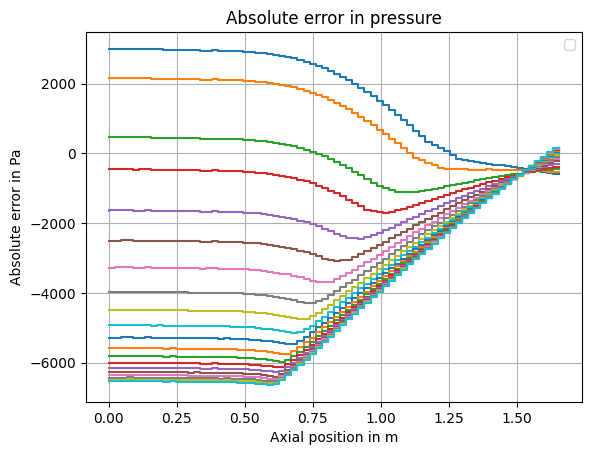

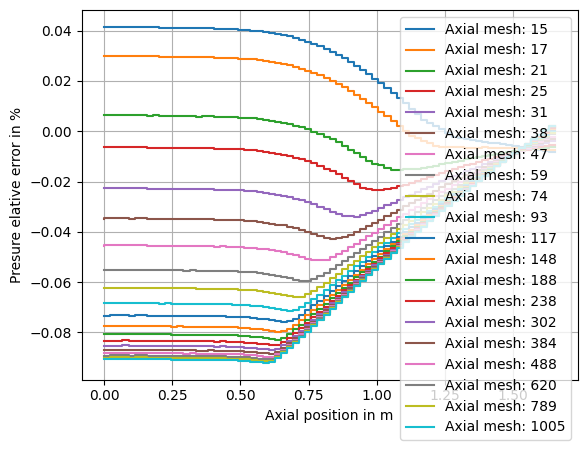

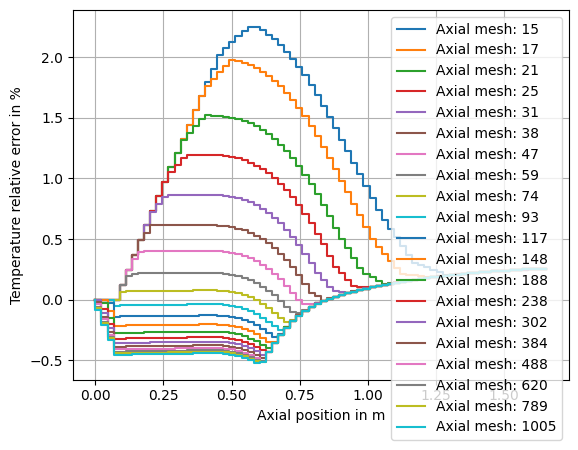

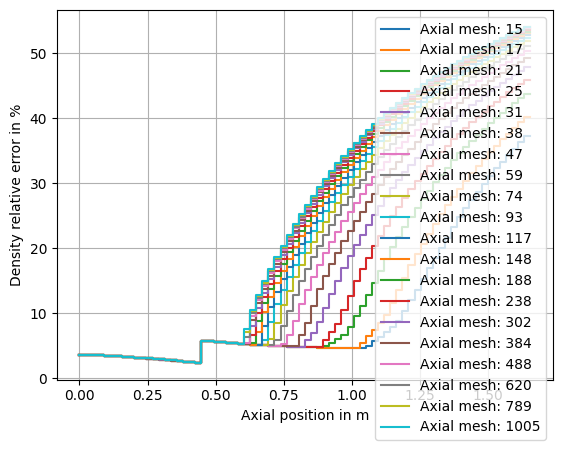

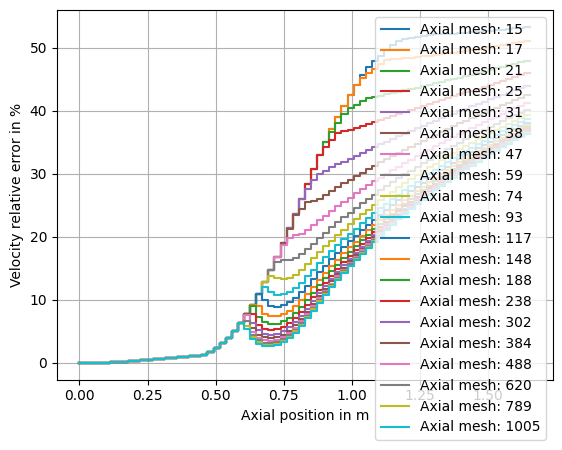

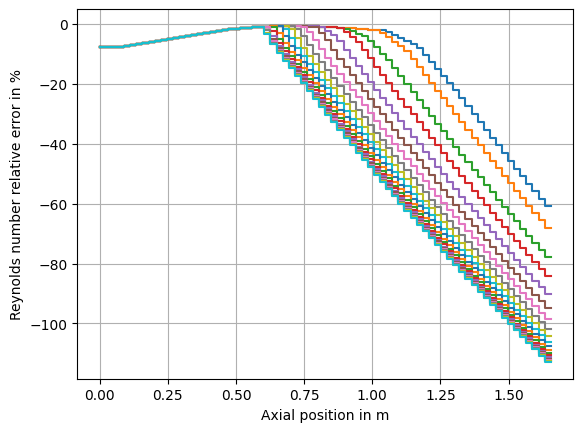

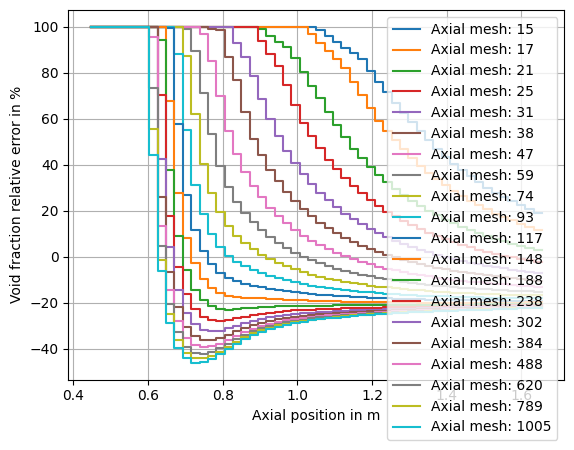

voidFraction Error: [11.677433912328668, 10.094299649343164, 7.477987139695291, 5.755295743032686, 4.271729984077626, 3.5060335523570774, 3.052470354552881, 2.899421603399535, 2.9750437489680412, 3.188919385060745, 3.487144375942142, 3.7746506353173457, 4.041513046886957, 4.258085540641603, 4.437471461622078, 4.593040581399745, 4.717096584907052, 4.8031369314819825, 4.872935718541392, 4.935105756878696]
Mean relative error in pressure: 0.023150620498021964, max relative error in pressure 0.04151164094100267 for axial mesh 15
Mean relative error in temperature: 0.9471420034629985, max relative error in temperature 2.250676847239132 for axial mesh 15
Mean relative error in density: 10.24310702056282, max relative error in density 37.3179038054236 for axial mesh 15
Mean relative error in velocity: 26.20040768453192, max relative error in velocity 53.300012309961254 for axial mesh 15
Mean relative error in Reynolds number: -12.389246960163252, max relative error in Reynolds number -0.75673

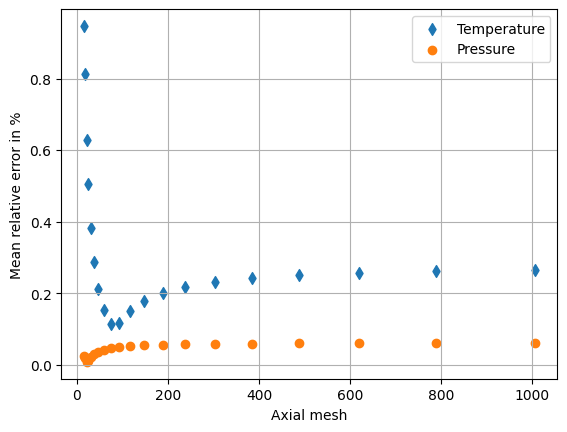

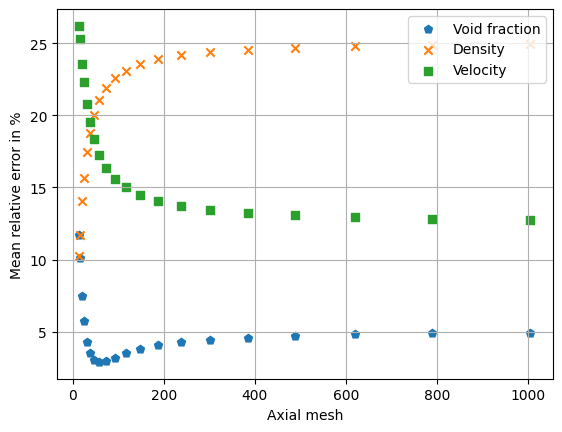

In [13]:
print(caseMerge)
for i in range(len(caseMerge)):
    print(f"Case {i}, voidFraction: {caseMerge[i].convection_sol.voidFraction}")

title1 = 400 * fuelRadius * 2 * np.pi * height #MW
title2 = 200 * fuelRadius * 2 * np.pi * height #MW
title3 = 100 * fuelRadius * 2 * np.pi * height #MW
#plotter = GFPlotterComp(caseMerge, [rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\THM_prototype\these\AT10_4', rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\THM_prototype\these\AT10_2', rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\THM_prototype\these\AT10_1'], "AT10_3power_oldHeight", [f"{title1:.2f} MW", f"{title2:.2f} MW", f"{title3:.2f} MW"])
#plotter.plotComparison()
plotter = GFPlotter(caseMerge, rf'C:\Users\cleme\OneDrive\Documents\Poly\BWR\THM_prototype\these\AT10_2', f"meshDependency_{title2:.2f}")
plotter.plotErrors()

[10, 12, 16, 20, 26, 33, 42, 54, 69, 88, 112, 143, 183, 233, 297, 379, 483, 615, 784, 1000]


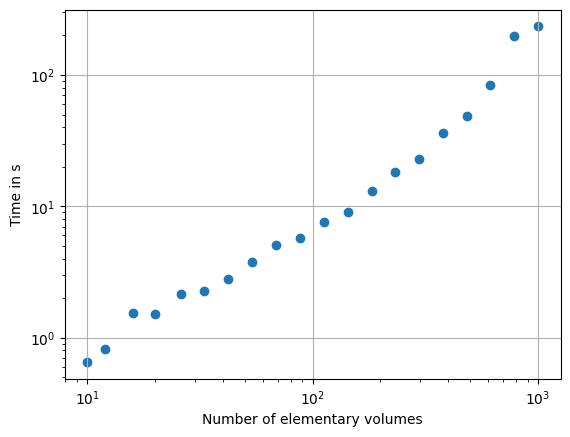

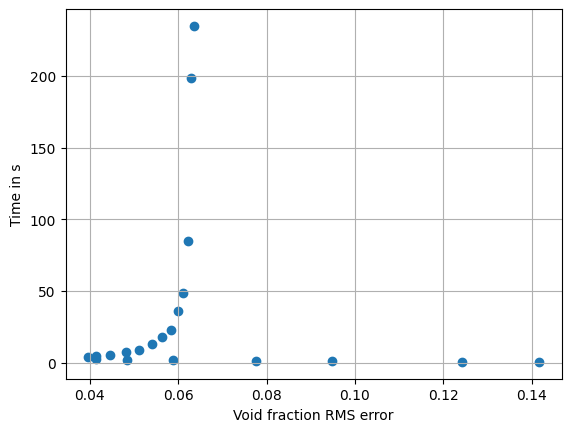

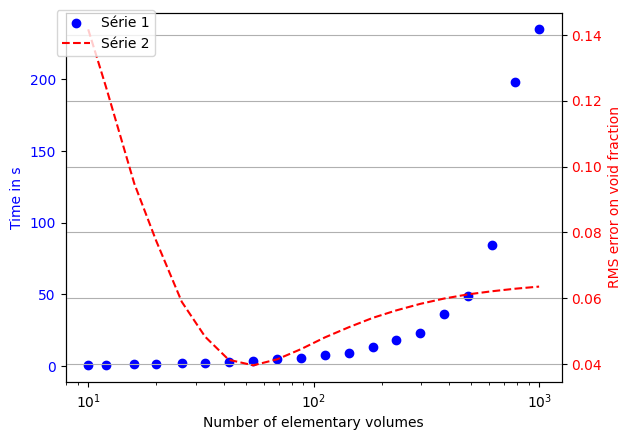

L\'ordre de convergence de la méthode est de 1.18


In [ ]:
print(listeZ)
fig17, ax17 = plt.subplots()
plt.scatter(listeZ, listeTime)
plt.xscale('log')
plt.yscale('log')
ax17.set_xlabel("Number of elementary volumes")
ax17.set_ylabel("Time in s")
ax17.grid()
fig17.savefig(rf'result\{plotter.case_name}\time.png', bbox_inches='tight')

fig18, ax18 = plt.subplots()
plt.scatter(plotter.RMS_eps, listeTime)
ax18.set_xlabel("Void fraction RMS error")
ax18.set_ylabel("Time in s")
ax18.grid()
fig18.savefig(rf'result\{plotter.case_name}\time_eps.png', bbox_inches='tight')


x = listeZ
y1 = listeTime
y2 = plotter.RMS_eps
# Création de la figure et des axes
fig, ax1 = plt.subplots()

# Premier graphique (scatter plot) avec l'axe de gauche
ax1.scatter(x, y1, color='blue', label='Série 1')
ax1.set_xscale('log')  # Échelle logarithmique pour x
ax1.set_ylabel('Time in s', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Deuxième axe y (axe de droite)
ax2 = ax1.twinx()  # Crée un second axe partageant le même axe x
ax2.plot(x, y2, color='red', label='Série 2', linestyle='--')
ax2.set_ylabel('RMS error on void fraction', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titre et configuration des axes
ax1.set_xlabel("Number of elementary volumes")
plt.grid()
# Afficher les légendes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Afficher le graphique


plt.show()


# Calcul des logarithmes
log_time = np.log(listeTime)
log_z = np.log(listeZ)

# Calcul de la pente p (moindre carrés pour une droite)
p = np.polyfit(log_z, log_time, 1)[0]
print(rf'L\'ordre de convergence de la méthode est de {p:.2f}')

